In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read data

In [ ]:

# world bank data, ignore last 2 rows
df_hcpi = pd.read_excel(
    "./../../assets/Inflation-data.xlsx",
    sheet_name="hcpi_q",
    skipfooter=2,
).drop(
    columns = ["Indicator Type", "Series Name"]
).set_index([
    "Country Code", "IMF Country Code", "Country"
])

# identify unnamed column and remove all columns after it
unnamed_col_idx = df_hcpi.columns.str.contains("Unnamed").argmax()
df_hcpi = df_hcpi.iloc[:, :unnamed_col_idx]

# turn columns into variables, set column name to "yearmonth"
df_hcpi = df_hcpi.stack().reset_index().rename(
    columns = {
        "level_3": "yearmonth",
        0: "hcpi"
    }
)

# yearmonth is 19861, 19862. Turn into datetime (1 is Q1, 2 is Q2, 3 is Q3, 4 is Q4)

def into_datetime(yearmonth):
    yearmonth = str(yearmonth)
    year = int(yearmonth[:4])
    quarter = int(yearmonth[4])
    month = quarter * 3 - 2
    return f"{year}-{month:02d}"

df_hcpi["yearmonth"] = df_hcpi["yearmonth"].apply(into_datetime)

# if hcpi is 0, replace with NaN
df_hcpi["hcpi"] = df_hcpi["hcpi"].replace(0, np.nan)
df_hcpi = df_hcpi[df_hcpi["hcpi"].notna()]

df_hcpi

In [91]:
df_hcpi.groupby("Country")["hcpi"].count().sort_values(ascending = False).head(50)

Country
Korea, Rep.              213
Norway                   213
Canada                   213
New Zealand              213
Guatemala                213
United States            213
Colombia                 213
Mauritius                213
Malaysia                 213
Cyprus                   213
Luxembourg               213
Denmark                  213
Dominican Republic       213
Japan                    213
Italy                    213
Ireland                  213
Fiji                     213
Finland                  213
France                   213
Indonesia                213
Germany                  213
Iceland                  213
Greece                   213
United Kingdom           213
Netherlands              213
Argentina                213
Singapore                213
Australia                213
Sweden                   213
Belgium                  213
Portugal                 213
South Africa             213
Philippines              213
Peru                     213
Switze

In [101]:
# We only retain the countries with 213 inflation data points
country_counts = df_hcpi.groupby("Country")["hcpi"].count()
df_hcpi = df_hcpi[df_hcpi["Country"].isin(country_counts[country_counts == country_counts.max()].index)]
df_hcpi

,Country Code,IMF Country Code,Country,yearmonth,hcpi
796,ARG,213,Argentina,1970-01,2.125775e-10
797,ARG,213,Argentina,1970-04,2.186104e-10
798,ARG,213,Argentina,1970-07,2.261299e-10
799,ARG,213,Argentina,1970-10,2.508335e-10
800,ARG,213,Argentina,1971-01,2.741703e-10
...,...,...,...,...,...
30646,ZAF,199,South Africa,2022-01,1.363000e+02
30647,ZAF,199,South Africa,2022-04,1.395000e+02
30648,ZAF,199,South Africa,2022-07,1.434000e+02
30649,ZAF,199,South Africa,2022-10,1.446160e+02


# 2. Visualize

In [106]:
df_hcpi_pct_change = df_hcpi.sort_values("yearmonth")

df_hcpi_pct_change["hcpi"] = df_hcpi_pct_change.groupby("Country")["hcpi"].pct_change()
df_hcpi_pct_change

,Country Code,IMF Country Code,Country,yearmonth,hcpi
796,ARG,213,Argentina,1970-01,NaN
14135,ITA,136,Italy,1970-01,NaN
26528,SWE,144,Sweden,1970-01,NaN
14883,JPN,158,Japan,1970-01,NaN
15886,KOR,542,"Korea, Rep.",1970-01,NaN
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01,0.010538
15095,JPN,158,Japan,2023-01,0.004500
14347,ITA,136,Italy,2023-01,0.003938
21470,NOR,142,Norway,2023-01,0.006886


Text(0.5, 0, 'Year')

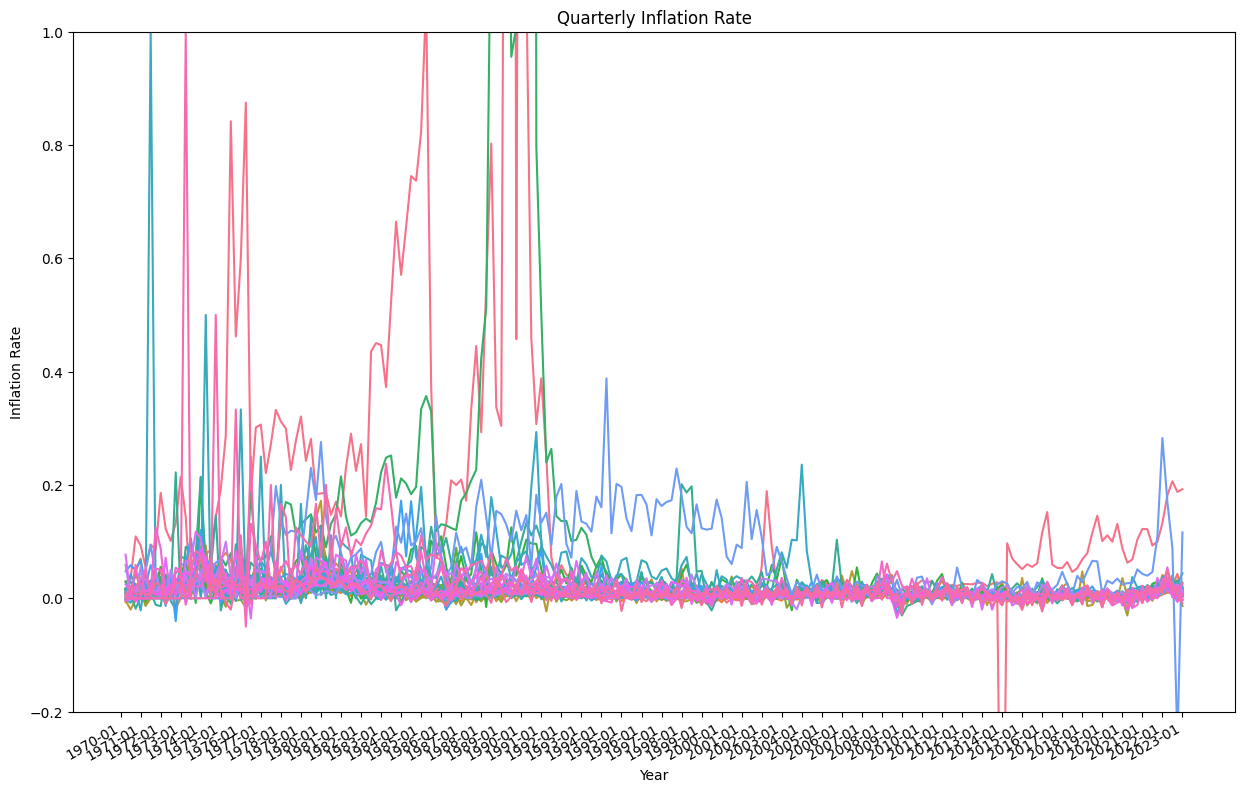

In [109]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.lineplot(
    data = df_hcpi_pct_change,
    x = "yearmonth",
    y = "hcpi",
    hue = "Country",
    ax = ax
)
# remove legend
ax.legend().remove()
# only plot every 4th year
ax.set_xticks(ax.get_xticks()[::4])
fig.autofmt_xdate()
fig.show()
ax.set_ylim(-0.2, 1)
ax.set_title("Quarterly Inflation Rate")
ax.set_ylabel("Inflation Rate")
ax.set_xlabel("Year")